In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('A_Z Handwritten Data.csv')

In [3]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = data.iloc[:, 0]
features = data.iloc[:, 1:]

In [8]:
features = np.array(features).reshape(-1, 28, 28, 1)

features = features / 255.0

In [22]:
labels = to_categorical(labels, num_classes=26)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [18]:
y_train.shape

(297960,)

In [19]:
X_train.shape

(297960, 28, 28, 1)

In [24]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
input_shape = (28, 28, 1)
num_classes = 26
model = create_model(input_shape, num_classes)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 94s 12ms/step - accuracy: 0.9161 - loss: 0.2943 - val_accuracy: 0.9826 - val_loss: 0.0619
Epoch 2/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 97s 13ms/step - accuracy: 0.9840 - loss: 0.0558 - val_accuracy: 0.9859 - val_loss: 0.0495
Epoch 3/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 92s 12ms/step - accuracy: 0.9893 - loss: 0.0372 - val_accuracy: 0.9878 - val_loss: 0.0444
Epoch 4/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 96s 13ms/step - accuracy: 0.9915 - loss: 0.0287 - val_accuracy: 0.9888 - val_loss: 0.0432
Epoch 5/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 93s 13ms/step - accuracy: 0.9930 - loss: 0.0224 - val_accuracy: 0.9891 - val_loss: 0.0415
Epoch 6/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 92s 12ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9902 - val_loss: 0.0382
Epoch 7/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 89s 12ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.9900 - val_loss: 0.0403
Epoch 8/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 128s 17ms/step - accuracy: 0.9955 

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9904 - loss: 0.0482
Test accuracy: 0.9904416799545288


In [36]:
def predict_image():
    random_index = np.random.randint(0, features.shape[0])

    random_image = features[random_index]
    random_label = np.argmax(labels[random_index])

    random_image_expanded = np.expand_dims(random_image, axis=0)

    prediction = model.predict(random_image_expanded)
    predicted_label = np.argmax(prediction)
    predicted_char = chr(predicted_label + ord('A'))

    plt.imshow(random_image.squeeze(), cmap='gray')
    plt.title(f'Predicted Label: {predicted_char}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


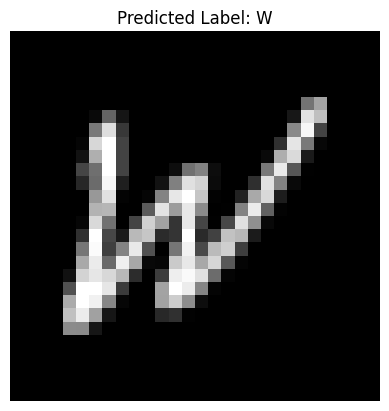

In [37]:
predict_image()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


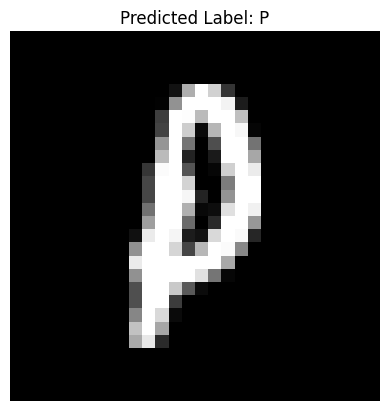

In [38]:
predict_image()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


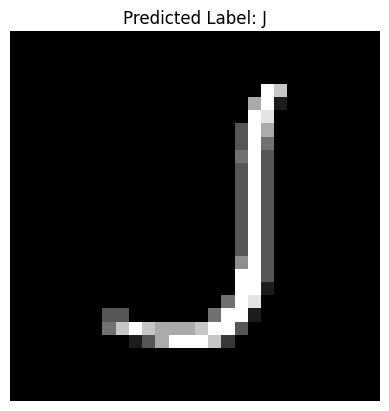

In [39]:
predict_image()

In [28]:
model.save('handwritten_model.h5')
model.save('handwritten_model.keras')